## Main Question
Forecasting the number of daily female birth based on the path data!

### Data Understanding

We will use the **Daily Female Births in CA in 1959** dataset.  
The dataset describes the number of **daily** female births in California 1959.  

Provider: Time Series Data Library  
Provider source: Newton (1988)  
Source URL: http://datamarket.com/data/list/?q=provider:tsdl  
Units: Births  
Dataset metrics: 365 fact values in 1 timeseries.  
Time granularity: Date  
Time range: 1 Jan 1959 – 31 Dec 1959  

In [11]:
from pandas import read_csv

In [ ]:
# Importing the dataset as a Series instead of a DataFrame

dataset = read_csv("Datasets/daily-total-female-births-CA.csv", header=0, index_col=0, parse_dates=True)

# header = 0 We must specify the header information at row 0.
# index_col = 0, We hint that the first column contains the index information for the time series.
# parse_dates = True, We give the function a hint that data in the first column contains dates that needs to be parsed.

In [14]:
dataset.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 1959-01-01 to 1959-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   births  365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


In [19]:
dataset.shape

(365, 1)

In [24]:
dataset.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


In [25]:
dataset.isnull().sum()

births    0
dtype: int64

### Basic Feature Engineering  
Time series must be re-framed as a supervised learning dataset before we can start using ML algorithms. There is no concept of input and output features in time series.  
Instead, we must choose the variable to be predicted and use feature engineering to construct all of the inputs that will be used to make predictions for future time steps.

**From:**  
time 1,     value 1  
time 2,     value 2  

**To:**  
input 1,    output 1  
input 2,    output 2  

In time series there is no concept of input and output variables; we must **invent** these two and frame the supervised learning problem from **scratch**.  

The difficulty is that we don't know the underlying inherent functional relationship between inputs and outputs that we are trying to expose. The only feedback we have  
is the performance of the models developed on the supervised learning datasets or views of the problem we create.  

In [26]:
import matplotlib.pyplot as plt

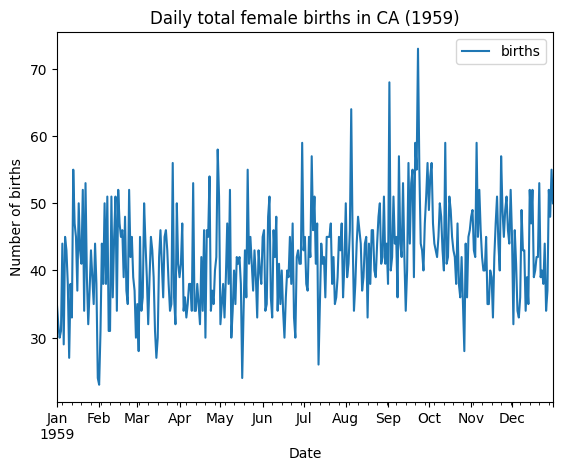

In [27]:
dataset.plot()
plt.title("Daily total female births in CA (1959)")
plt.xlabel('Date')
plt.ylabel('Number of births')
plt.show()

**Trend**: A trend refers to the long-term increase or decrease in the data over time. For example, if the number of births consistently increases or decreases throughout the year, that's a trend.  From the plot, it seems there might be an upward trend in August.

**Seasonality**: Seasonality refers to regular patterns that repeat at consistent intervals, such as monthly or yearly. If there are peaks and troughs that repeat every month or season, that's a sign of seasonality. There is a noticeable increase in August, which might suggest some seasonal effect.

**Cyclic Patterns**: Unlike seasonality, cyclic patterns occur at irregular intervals. These are typically influenced by broader economic or environmental factors.

**Noise**: Noise is the random variation that is not part of the trend or seasonality. It's the “ups and downs” you see in the plot.